In [1]:
import cv2  as cv2

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as platform
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers  import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


In [4]:
fldr = "./UTKFace"

In [5]:
import os
flies = os.listdir(fldr)

In [6]:
import cv2 as cv2

In [7]:
ages = []
genders = []
images = []

for fle in flies:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr+ '/'+fle
    print(total)
    image = cv2.imread(total)
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [8]:
#create list of age and gender from the dataset
for fle in flies:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

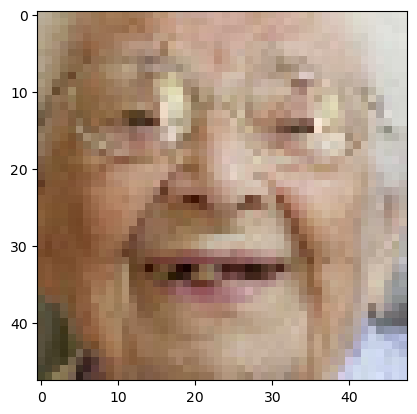

In [9]:
import matplotlib.pyplot as plt
plt.imshow(images[15])

In [10]:
print(ages[15])
print(genders[15])

105
1


In [11]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [12]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [13]:
#finding the number of elements in the dataset
values,counts = np.unique(genders_f,return_counts=True)
print(counts)
#unique genders(male,female)

[12391 11317]


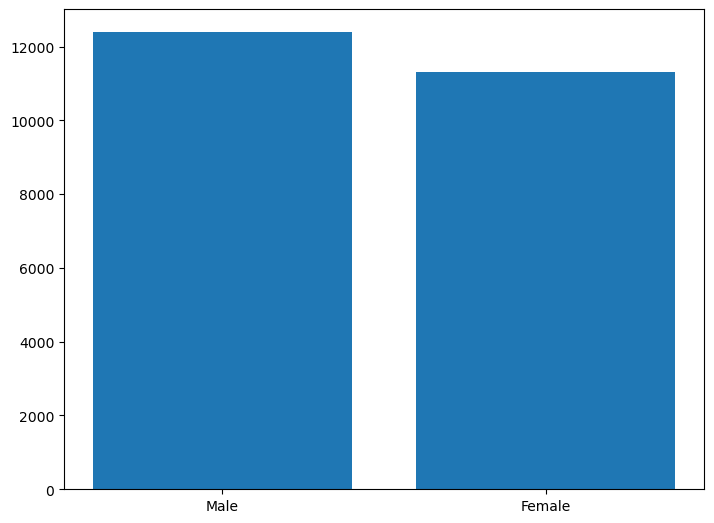

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender=['Male','Female']
values = [12391,11317]
ax.bar(gender,values)
plt.show()

In [15]:
values,counts= np.unique(ages_f,return_counts = True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [16]:
#converting age counts to list
val = values.tolist()
cnt = counts.tolist()


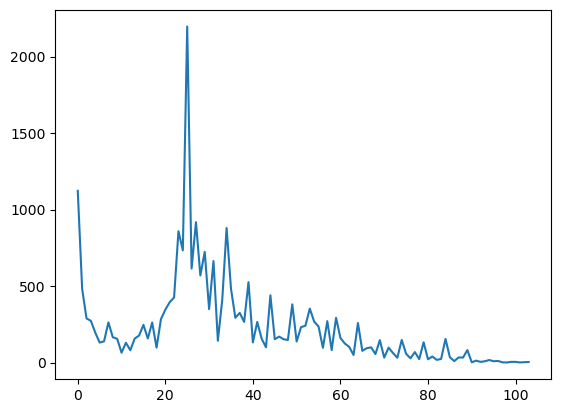

In [17]:
#plotting the sample agewise
plt.plot(counts)
plt.show()

In [18]:
labels = []
i = 0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i+1

In [19]:
images_f_2 = images_f/255


In [20]:
images_f_2.shape

(23708, 48, 48, 3)

In [21]:
labels_f= np.array(labels)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [24]:
y_train[0:5]

array([[26,  1],
       [72,  1],
       [16,  1],
       [28,  0],
       [55,  0]])

In [25]:
y_train_2 = [y_train[:,1],y_train[:,0]] 
y_test_2 = [y_test[:,1],y_test[:,0]] 

In [26]:
y_train_2[0][0:5]

array([1, 1, 1, 0, 0])

In [27]:
y_train_2[1][0:5]

array([26, 72, 16, 28, 55])

In [28]:
#defining the model 
from tensorflow.keras.models import Model
def Convolution(input_tensor,filters):
    x = Conv2D(filters = filters,kernel_size = (3,3),padding = "same",strides = (1,1),kernel_regularizer = l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [29]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1,activation = 'sigmoid',name = 'sex_out')(drop_1)
    output_2 = Dense(1,activation = 'relu',name = 'age_out')(drop_2)
    model = Model(inputs = [inputs], outputs = [output_1,output_2])
    model.compile(loss = ["binary_crossentropy","mae"],optimizer = 'Adam',metrics=["accuracy"])
    return model    

In [30]:
Model = model((48,48,3))

In [31]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
fle_s = 'Age_sex_Detecton.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose = 1,save_best_only=True,save_weights_only=False, mode='auto', save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list = [checkpoint,Early_stop]

In [34]:
History = Model.fit(x_train,y_train_2,batch_size = 64,validation_data=(x_test,y_test_2),epochs=250,callbacks = callback_list)


Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 17.0377 - sex_out_loss: 0.6974 - age_out_loss: 16.1591 - sex_out_accuracy: 0.5410 - age_out_accuracy: 0.0470
Epoch 1: val_loss improved from inf to 15.61034, saving model to Age_sex_Detecton.h5


c:\Users\Monika\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 86s 293ms/step - loss: 17.0377 - sex_out_loss: 0.6974 - age_out_loss: 16.1591 - sex_out_accuracy: 0.5410 - age_out_accuracy: 0.0470 - val_loss: 15.6103 - val_sex_out_loss: 0.6757 - val_age_out_loss: 14.7655 - val_sex_out_accuracy: 0.5338 - val_age_out_accuracy: 0.0471
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.3956 - sex_out_loss: 0.6378 - age_out_loss: 12.5553 - sex_out_accuracy: 0.6566 - age_out_accuracy: 0.0459
Epoch 2: val_loss improved from 15.61034 to 11.88423, saving model to Age_sex_Detecton.h5
278/278 [==============================] - 82s 295ms/step - loss: 13.3956 - sex_out_loss: 0.6378 - age_out_loss: 12.5553 - sex_out_accuracy: 0.6566 - age_out_accuracy: 0.0459 - val_loss: 11.8842 - val_sex_out_loss: 0.5999 - val_age_out_loss: 11.0460 - val_sex_out_accuracy: 0.7162 - val_age_out_accuracy: 0.0471
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 11.0758 - sex_out_loss: 0.5574 - ag

In [35]:
Model.evaluate(x_test,y_test_2)

186/186 [==============================] - 5s 27ms/step - loss: 7.5929 - sex_out_loss: 0.2599 - age_out_loss: 6.6654 - sex_out_accuracy: 0.8858 - age_out_accuracy: 0.0471


[7.592921733856201,
 0.2599160671234131,
 6.6653571128845215,
 0.885776937007904,
 0.047072719782590866]

In [36]:
pred = Model.predict(x_test)

186/186 [==============================] - 5s 26ms/step


In [37]:
pred[1]

array([[25.556679],
       [76.71466 ],
       [46.573296],
       ...,
       [35.37045 ],
       [28.591516],
       [36.096542]], dtype=float32)

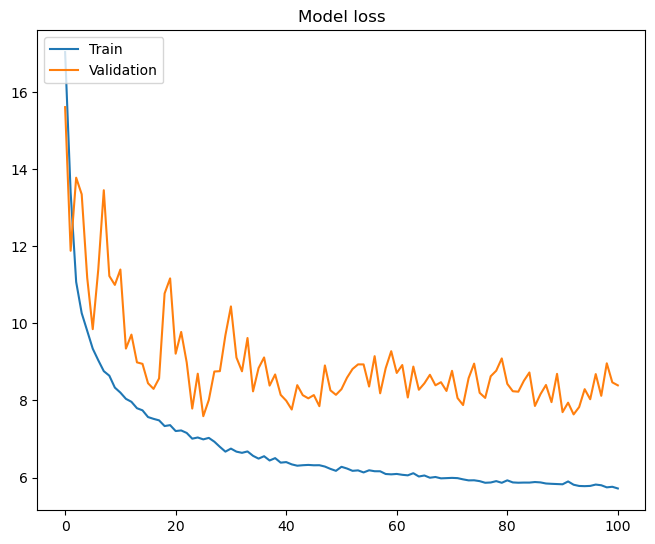

In [38]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel = ('Epoch')
plt.ylabel = ('Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom = 0.0,right = 0.95,left = 0,hspace = 0.25,wspace=0.35)


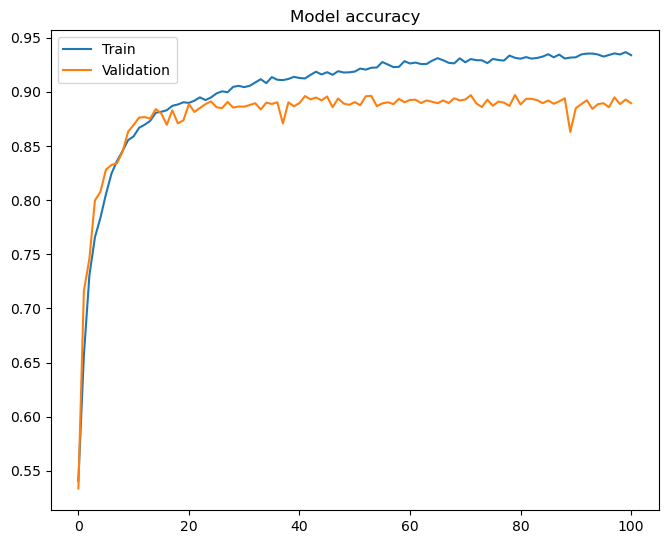

In [39]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.xlabel = ('Epoch')
plt.ylabel = ('Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom = 0.0,right = 0.95,left = 0,hspace = 0.25,wspace=0.35)



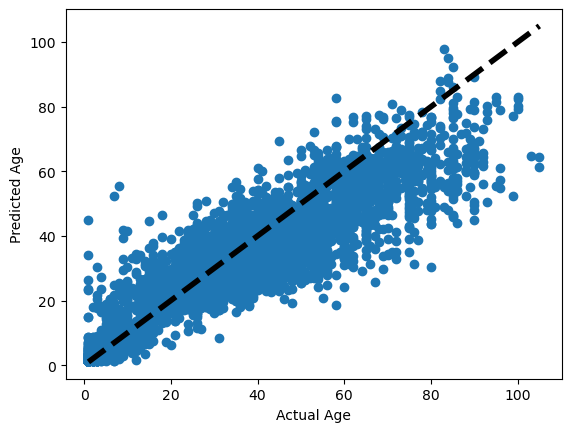

In [40]:
fig,ax = plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [41]:
i = 0
Pred_l = []
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i = i+1

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
report = classification_report(y_test_2[0],Pred_l)

In [44]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3103
           1       0.85      0.93      0.89      2824

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [45]:
results = confusion_matrix(y_test_2[0],Pred_l)

In [46]:
import seaborn as sns

<AxesSubplot:>

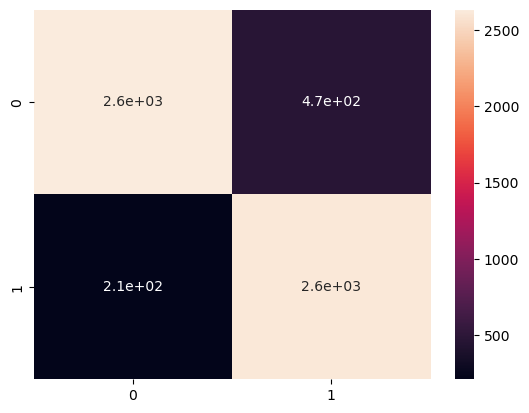

In [47]:
sns.heatmap(results,annot=True)

In [48]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is"+ sex_f[sex])
    

1/1 [==============================] - 0s 36ms/step
Predicted Age is 80
Predicted Gender isMale


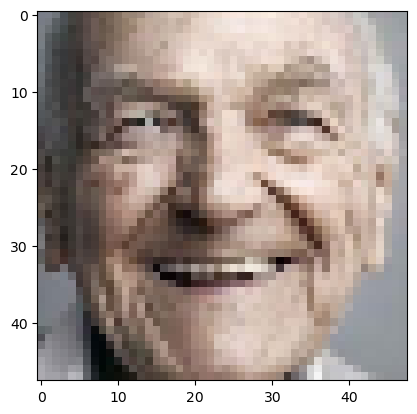

In [54]:
test_image(1,images_f,images_f_2,Model)

1/1 [==============================] - 0s 28ms/step
Predicted Age is 8
Predicted Gender isMale


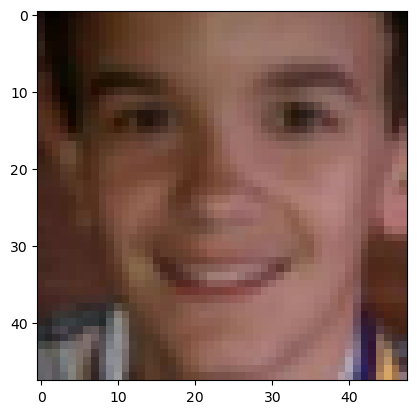

In [56]:
test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 71ms/step
Predicted Age is 24
Predicted Gender isMale


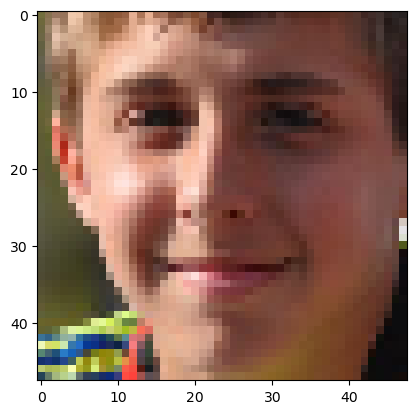

In [57]:
test_image(888,images_f,images_f_2,Model)

1/1 [==============================] - 0s 29ms/step
Predicted Age is 20
Predicted Gender isFemale


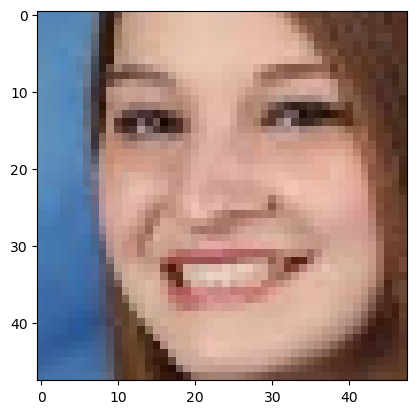

In [58]:
test_image(1288,images_f,images_f_2,Model)